In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm1
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [32]:
data=pd.read_csv('housing.csv',index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


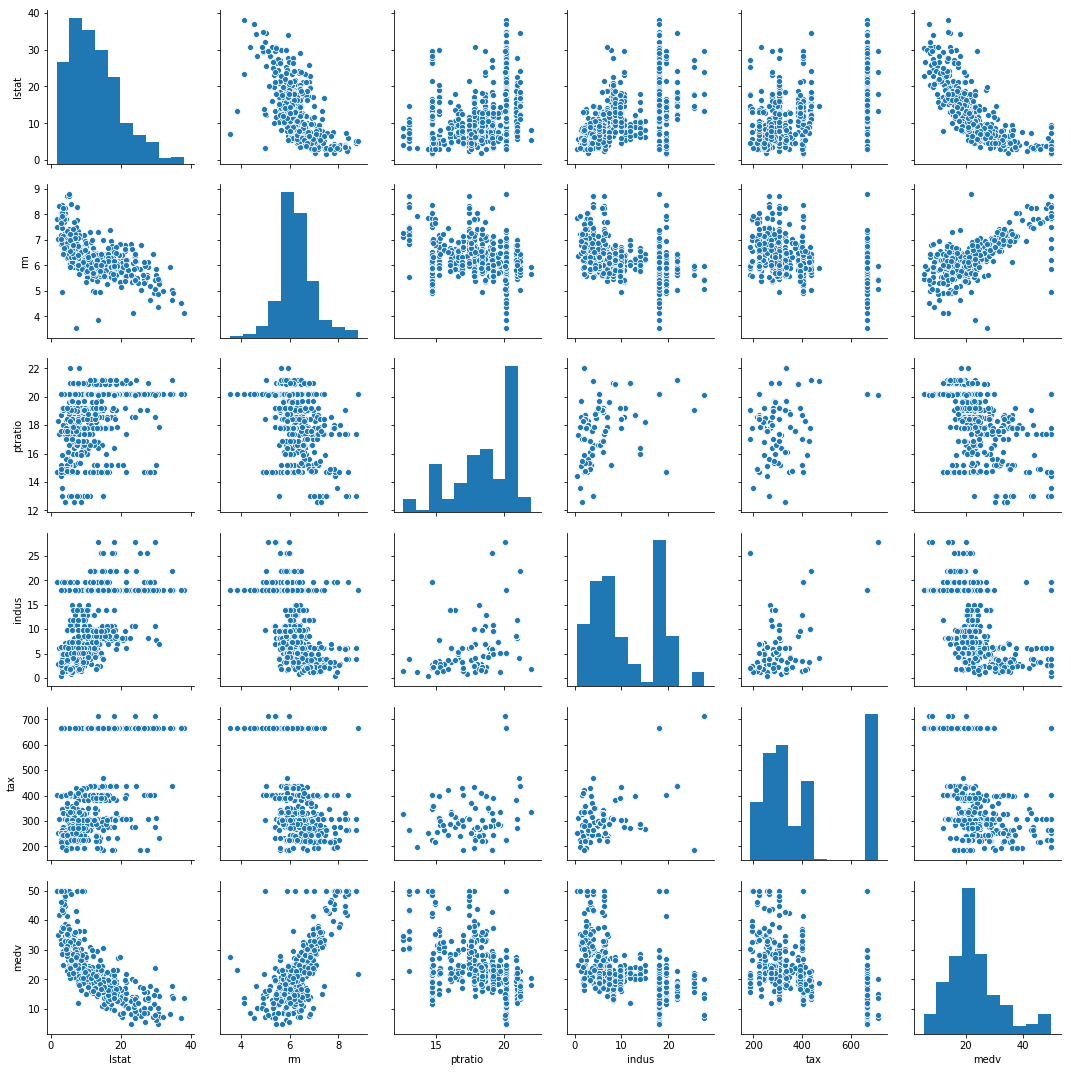

In [34]:
sns.pairplot(data[['lstat','rm','ptratio','indus','tax','medv']])
plt.show()

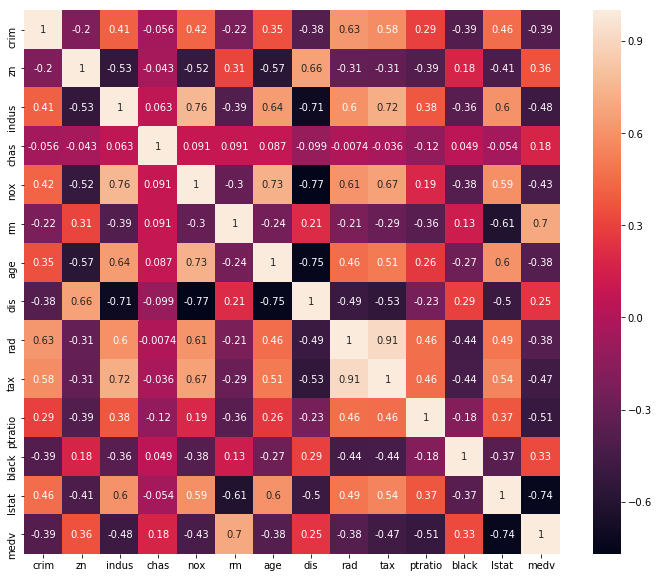

In [35]:
plt.figure(figsize=[12,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [36]:
x=data.drop(['medv','age','indus'],axis=1)
y=data.medv
import statsmodels.formula.api as ap
from statsmodels.api import add_constant 
x1=add_constant(x) #adding a constant as intercept else the line is forced plotted thru origin
ls=ap.OLS(y,x1) # gives the 
ls=ls.fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          5.54e-137
Time:                        16:59:56   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
L=[]
RMSE=[]
m=[]
c=[]
LR=LinearRegression()
LR.fit(pd.DataFrame(x),y)
m.append(LR.coef_)
c.append(LR.intercept_)
sales_pred=LR.predict(pd.DataFrame(x))
L.append(LR.score(pd.DataFrame(x),y))
RMSE.append(np.sqrt(np.mean((y-sales_pred)**2)))
pred=pd.DataFrame(sales_pred)   


In [38]:
RMSE

[4.679735971158225]

#  Based on Corr() value and Pairplot observation  lstat and rm has highest correlation with medv

In [69]:
data['lstat:lstat']=data.lstat*data.lstat
data['lstat*3']=data.lstat*data.lstat*data.lstat
data['rm:rm']=data.rm*data.rm

In [74]:
x1=data['lstat']
x2=data.rm
x3=data[['lstat','rm']]
x4=data[['lstat','rm','lstat:lstat']]
x5=data[['lstat','rm','rm:rm']]
x6=data[['lstat','rm','lstat*3']]
y=data['medv']
x=[x1,x2,x3,x4,x5,x6]
#x=[x1,x2,x3]

In [75]:
L=[]
RMSE=[]
m=[]
c=[]
for i in x:
    LR=LinearRegression()
    LR.fit(pd.DataFrame(i),y)
    m.append(LR.coef_)
    c.append(LR.intercept_)
    sales_pred=LR.predict(pd.DataFrame(i))
    L.append(LR.score(pd.DataFrame(i),y))
    RMSE.append(np.sqrt(np.mean((y-sales_pred)**2)))
pred=pd.DataFrame(sales_pred)   
col=['mod1','mod2','mod3','mod4','mod5','mod6']
RM=pd.DataFrame({'Model':col,'RMSE_score':RMSE,'R2 VALUE':L,'Intercept':c,'Coeff':m})
RM

,Model,RMSE_score,R2 VALUE,Intercept,Coeff
0,mod1,6.203464,0.544146,34.553841,[-0.9500493537579909]
1,mod2,6.603071,0.483525,-34.670621,[9.102108981180308]
2,mod3,5.523809,0.638562,-1.358273,"[-0.6423583342441292, 5.0947879843365405]"
3,mod4,5.006663,0.703070,11.689640,"[-1.8486335963059581, 4.227265116666622, 0.036..."
4,mod5,4.758608,0.731764,123.457199,"[-0.7038357080879868, -33.62015461192706, 2.98..."
5,mod6,5.049654,0.697949,7.209776,"[-1.2598567123353752, 4.533451466046339, 0.000..."


In [48]:
import statsmodels.formula.api as ap
from statsmodels.api import add_constant 
x=add_constant(x3) #adding a constant as intercept else the line is forced plotted thru origin
ls=ap.OLS(y,x) # gives the 
ls=ls.fit()
ls.summary()

ValueError: The indices for endog and exog are not aligned

In [62]:
qr=PolynomialFeatures(degree=3)
x_qr=qr.fit_transform(x1)
x_qr_df=pd.DataFrame(x_qr)

In [63]:
x_qr_df.drop(0,axis=1,inplace=True)
x_qr_df.head()

,1,2,3
0,4.98,24.8004,123.505992
1,9.14,83.5396,763.551944
2,4.03,16.2409,65.450827
3,2.94,8.6436,25.412184
4,5.33,28.4089,151.419437


In [64]:
idx=np.arange(data.shape[0])
y.index=idx

In [65]:
x_qr_df=pd.concat([x_qr_df,y],axis=1)


In [66]:
x_qr_df.columns=['f1','f2','f3','medv']
x_qr_df.head()

,f1,f2,f3,medv
0,4.98,24.8004,123.505992,24.0
1,9.14,83.5396,763.551944,21.6
2,4.03,16.2409,65.450827,34.7
3,2.94,8.6436,25.412184,33.4
4,5.33,28.4089,151.419437,36.2


In [68]:
m2=sm.ols('medv~f1+f2+f3',x_qr_df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          1.78e-116
Time:                        17:04:22   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.6496      1.435     33.909      0.000      45.831      51.468
f1            -3.8656      0.329    -11.757      0.000      -4.512      -3.220
f2             0.1487      0.021      6.983      0.000       0.107       0.191
f3            -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""